In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None) 
plt.rcParams['figure.figsize'] = [16, 10]

C:\Users\Aditya\Anaconda2\envs\tensorflow_win\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("new_train.csv")

In [3]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_dayofweek,pickup_hour,pickup_day,pickup_second,maximum temerature,minimum temperature,average temperature,precipitation,snow fall,snow depth,log_trip_duration,distance,pickup_cluster,dropoff_cluster,fwd_N,fwd_Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,0,17,14,6369878.0,51,40,45.5,0.29,0.0,0.0,6.120297,1.502172,12,18,1,0
1,1,1,-73.975090,40.758766,-73.953201,40.765068,1346,3,0,14,14,6357922.0,51,40,45.5,0.29,0.0,0.0,7.204893,1.976279,0,18,1,0
2,1,1,-73.994484,40.745087,-73.998993,40.722710,695,3,0,15,14,6361461.0,51,40,45.5,0.29,0.0,0.0,6.543912,2.513961,8,16,1,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,755,3,0,4,14,6323059.0,51,40,45.5,0.29,0.0,0.0,6.626718,2.911908,7,7,1,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,1050,3,0,14,14,6361059.0,51,40,45.5,0.29,0.0,0.0,6.956545,2.231986,18,12,1,0


In [4]:
train = data.drop(['trip_duration', 'log_trip_duration' ],axis=1)
train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_dayofweek,pickup_hour,pickup_day,pickup_second,maximum temerature,minimum temperature,average temperature,precipitation,snow fall,snow depth,distance,pickup_cluster,dropoff_cluster,fwd_N,fwd_Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,3,0,17,14,6369878.0,51,40,45.5,0.29,0.0,0.0,1.502172,12,18,1,0
1,1,1,-73.975090,40.758766,-73.953201,40.765068,3,0,14,14,6357922.0,51,40,45.5,0.29,0.0,0.0,1.976279,0,18,1,0
2,1,1,-73.994484,40.745087,-73.998993,40.722710,3,0,15,14,6361461.0,51,40,45.5,0.29,0.0,0.0,2.513961,8,16,1,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,3,0,4,14,6323059.0,51,40,45.5,0.29,0.0,0.0,2.911908,7,7,1,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,3,0,14,14,6361059.0,51,40,45.5,0.29,0.0,0.0,2.231986,18,12,1,0


In [5]:
def rmsle(real, predicted): # Calculating RMSLE
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train, data['log_trip_duration'], test_size=0.2, random_state=43)

In [7]:
dtrain = xgb.DMatrix(X_train, label=y_train)  #Converting data and specifying hyperparameters and training
dvalid = xgb.DMatrix(X_valid, label=y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.3
params["min_child_weight"] = 30
params["subsample"] = 0.8
params["colsample_bytree"] = 0.3
params["scale_pos_weight"] = 1.0
params["silent"] = 1
params["booster"] = "gbtree"
params["max_depth"] = 10
params["eval_metric"]= "rmse"


plst = list(params.items())

model = xgb.train(plst, dtrain, 200, watchlist, early_stopping_rounds=50, maximize=False, 
                  verbose_eval=20)

[0]	train-rmse:4.23078	valid-rmse:4.23275
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[20]	train-rmse:0.399653	valid-rmse:0.407648
[40]	train-rmse:0.367328	valid-rmse:0.380701
[60]	train-rmse:0.352483	valid-rmse:0.370594
[80]	train-rmse:0.343777	valid-rmse:0.365853
[100]	train-rmse:0.338327	valid-rmse:0.364284
[120]	train-rmse:0.333235	valid-rmse:0.362594
[140]	train-rmse:0.32932	valid-rmse:0.362199
[160]	train-rmse:0.325897	valid-rmse:0.361295
[180]	train-rmse:0.322278	valid-rmse:0.359939


In [8]:
dtest = xgb.DMatrix(X_valid)
pred = np.abs(model.predict(dtest))

In [9]:
print("RMSLE =",rmsle(np.exp(y_valid.values), np.exp(pred)))   #displaying cv scores
print("RMSE =",np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(pred))))
print("r2_score =",r2_score(np.exp(y_valid), np.exp(pred)))

0.357141690279
297.670262144
0.789962120709


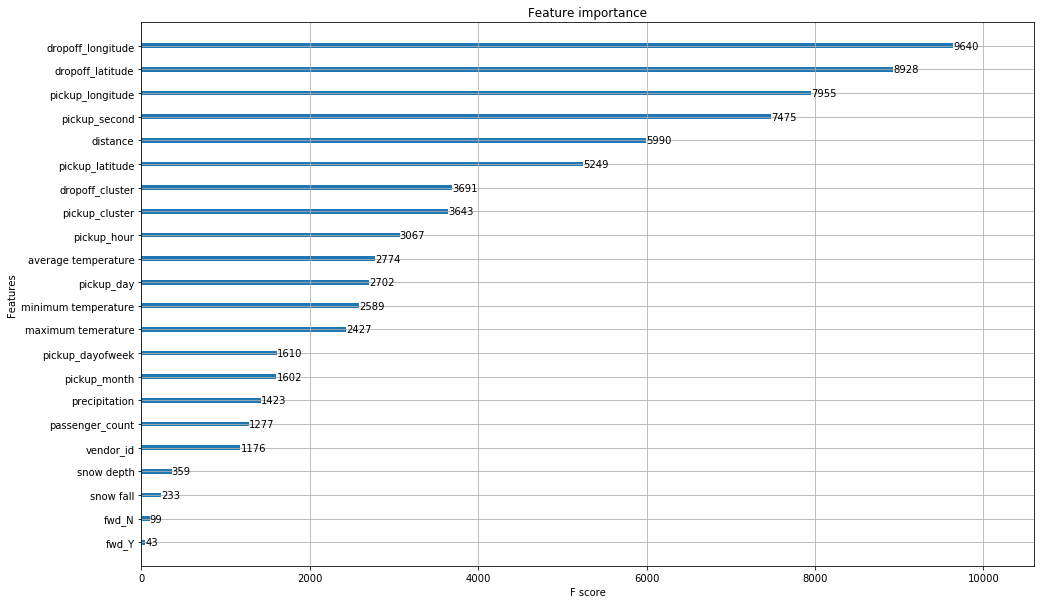

In [10]:
xgb.plot_importance(model) #Displaying feature importances
plt.show()

In [11]:
testd  = pd.read_csv("new_test.csv") 

In [12]:
ids = testd['id']

In [13]:
testd.head()
test = testd.drop(['id'], axis=1)

In [14]:
dtest = xgb.DMatrix(test)
pred = np.abs(model.predict(dtest))

In [15]:
submission = pd.DataFrame({'id': ids, 'trip_duration': np.exp(pred)}) #Predicting on kaggle test data
submission.to_csv('xgbfinal.csv', index=False)

In [16]:
from sklearn.ensemble import RandomForestRegressor #Training Random Forest model

reg = RandomForestRegressor(n_estimators = 40, random_state=0)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
pred = reg.predict(X_valid) #prediciting on validation data

In [18]:
print("RMSLE =",rmsle(np.exp(y_valid.values), np.exp(pred)))   #displaying cv scores
print("RMSE =",np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(pred))))
print("r2_score =",r2_score(np.exp(y_valid), np.exp(pred)))

0.358633725162
296.891651848
0.79105946764


In [19]:
pred = np.abs(reg.predict(test))

In [20]:
submission = pd.DataFrame({'id': ids, 'trip_duration': np.exp(pred)}) #Writing predictions on kaggle test data to disk
submission.to_csv('rffinal.csv', index=False)